<a href="https://colab.research.google.com/github/anushChrist/AML_Lab/blob/main/2348504_Decision_Tree_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


In [ ]:
df = pd.read_csv(r'insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


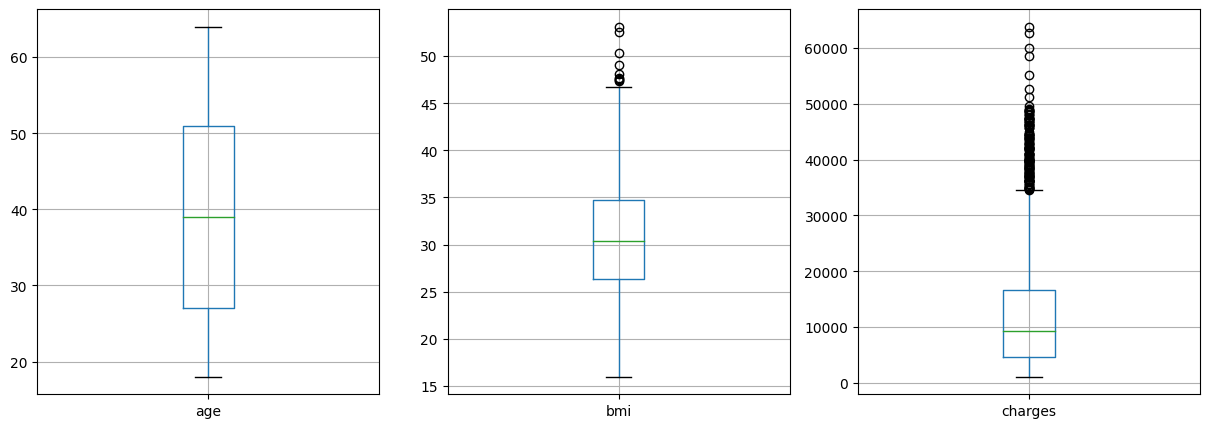

In [ ]:
fig, axes = plt.subplots(ncols = 3, figsize = (15, 5))
df.boxplot(column='age', ax = axes[0])
df.boxplot(column='bmi',ax = axes[1])
df.boxplot(column='charges', ax = axes[2])
plt.show()

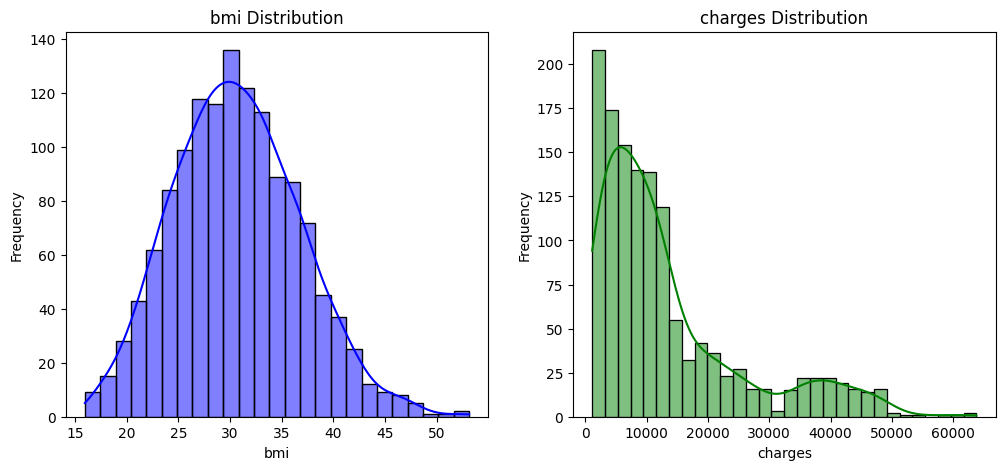

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['bmi'], kde=True, color='blue')
plt.title('bmi Distribution')
plt.xlabel('bmi')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['charges'], kde=True, color='green')
plt.title('charges Distribution')
plt.xlabel('charges')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers_bmi = df[(df['bmi'] < Q1 - 1.5 * IQR) | (df['bmi'] > Q3 + 1.5 * IQR)]
df = df.drop(iqr_outliers_bmi.index)

Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1
iqr_outliers_charges = df[(df['charges'] < Q1 - 1.5 * IQR) | (df['charges'] > Q3 + 1.5 * IQR)]
df = df.drop(iqr_outliers_charges.index)

In [ ]:
X = df.drop(columns=['charges'])
Y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(x_train)

array([ 4260.744   ,  5934.3798  ,  9583.8933  ,  9880.068   ,
        6653.7886  ,  1391.5287  , 11737.84884 ,  6940.90985 ,
       23568.272   ,  4719.52405 ,  8871.1517  ,  4239.89265 ,
        7077.1894  ,  1977.815   , 30184.9367  ,  7729.64575 ,
       13880.949   ,  1131.5066  , 20773.62775 , 11362.755   ,
       20149.3229  ,  9722.7695  ,  1628.4709  ,  8527.532   ,
        3070.8087  ,  7162.0122  ,  2913.569   ,  5594.8455  ,
        3556.9223  , 15612.19335 ,  2803.69785 ,  4527.18295 ,
        6948.7008  ,  3208.787   ,  2566.4707  , 21984.47061 ,
        1708.0014  ,  8703.456   ,  5630.45785 ,  3987.926   ,
        8442.667   , 13126.67745 ,  4347.02335 ,  5584.3057  ,
        5662.225   ,  1646.4297  , 19107.7796  ,  6113.23105 ,
        3056.3881  ,  3044.2133  ,  7243.8136  , 13937.6665  ,
       19594.80965 , 18955.22017 , 11520.09985 ,  8017.06115 ,
       25517.11363 ,  5469.0066  ,  5972.378   ,  1532.4697  ,
        2755.02095 ,  3659.346   ,  1615.7667  ,  1826.

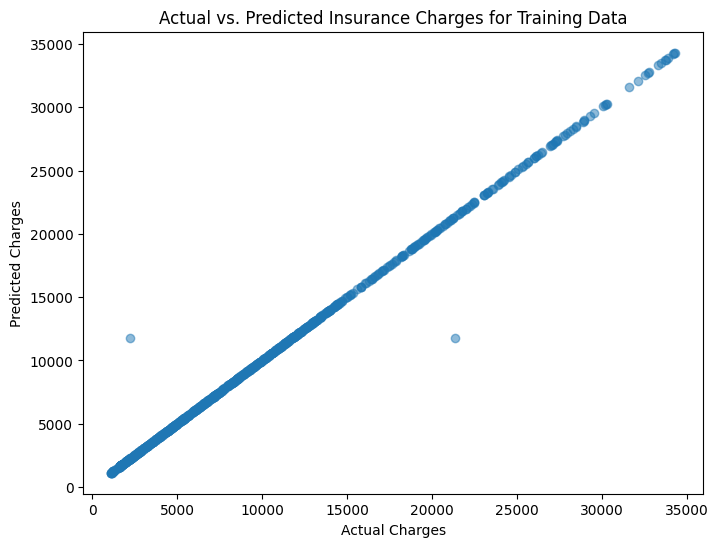

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Insurance Charges for Training Data')
plt.show()


In [ ]:
y_pred = regressor.predict(x_test)

### Shows Overfitting

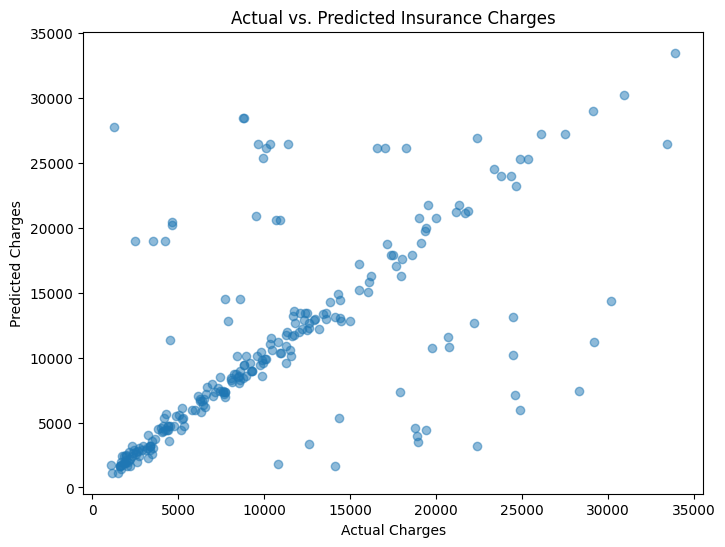

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Insurance Charges')
plt.show()


### Much less accuracy on Training Data